In [1]:
import battleship as ship
import genetic_algorithm as ga

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

Correct number of pieces on board
0000000010000000001000000000100000000010000011001000000000000000111000000000000011111110000000000000


Text(0.5, 1.0, 'Battleship Board')

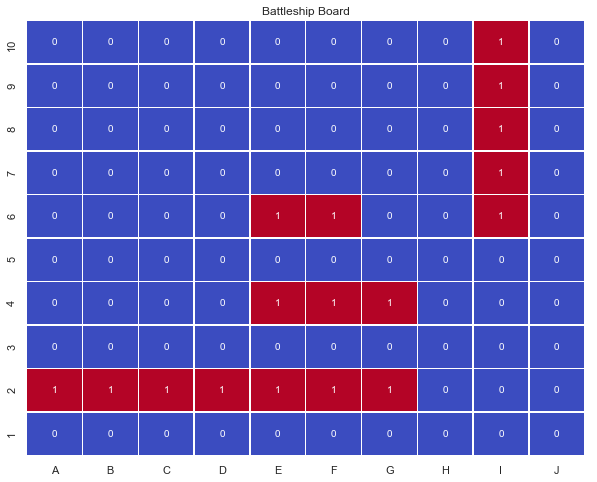

In [2]:
#create a new board and solution
board, solution = ship.new_board()

# print the genetic solution
print(solution)

# add the board to a dataframe for plotting
df = pd.DataFrame(board, columns=['A','B','C','D','E','F','G','H','I','J',])
df['ylabel'] = range(10,0,-1)
df = df.set_index('ylabel')

# print the board using a heatmap
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
sns.heatmap(df, cmap='coolwarm', linewidths=0.5, annot=True, fmt='d', cbar=False)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title('Battleship Board')

In [3]:
# initialize the first random generation
generation_size = 10
gene_pool = ga.random_generation(generation_size, 100)

# compare fitness
gene_pool['Fitness'] = gene_pool.apply(lambda row: ship.accuracy(row.Chromosome, solution), axis=1)

# assign elites with elite rate
elite_rate = 0.20
gene_pool = ga.assign_elites(gene_pool, elite_rate)
gene_pool

,Sequence,Chromosome,Generation,Birth,Fitness,Parents,Elite
3,4,0000110110101100101101011010010111000111010010...,1,Random,0.59,0,True
2,3,1001101110100011010100110001000110011011011001...,1,Random,0.54,0,True
4,5,1001110110111010011001000100001011010011110111...,1,Random,0.50,0,False
0,1,0100111001001000100110101010001001111011111101...,1,Random,0.48,0,False
5,6,1001111110001000110011111110001000110101101111...,1,Random,0.48,0,False
7,8,1110010110101110001111100101110101010100000100...,1,Random,0.48,0,False
6,7,1010101101011110010101000000100111111100101101...,1,Random,0.47,0,False
8,9,0100010101011001101101101011111000111011000001...,1,Random,0.47,0,False
1,2,1011101001111110110001001100111100101110110110...,1,Random,0.43,0,False
9,10,0011011100111101110101001011100111100000110001...,1,Random,0.42,0,False


In [4]:
gene_pool.describe()

,Fitness
count,10.000000
mean,0.486000
std,0.049486
min,0.420000
25%,0.470000
50%,0.480000
75%,0.495000
max,0.590000


In [5]:
gene_pool = ga.create_descendents(gene_pool, elite_rate, solution, 1.0)

1: 0.59
2: 0.6
3: 0.6
4: 0.61
5: 0.61
6: 0.62
7: 0.63
8: 0.65
9: 0.66
10: 0.66
11: 0.67
12: 0.68
13: 0.68
14: 0.68
15: 0.68
16: 0.7
17: 0.7
18: 0.7
19: 0.7
20: 0.72
21: 0.72
22: 0.74
23: 0.74
24: 0.75
25: 0.76
26: 0.76
27: 0.78
28: 0.79
29: 0.79
30: 0.79
31: 0.79
32: 0.8
33: 0.8
34: 0.8
35: 0.8
36: 0.81
37: 0.81
38: 0.81
39: 0.82
40: 0.82
41: 0.82
42: 0.83
43: 0.83
44: 0.83
45: 0.84
46: 0.85
47: 0.86
48: 0.88
49: 0.88
50: 0.88
51: 0.88
52: 0.89
53: 0.89
54: 0.89
55: 0.9
56: 0.9
57: 0.9
58: 0.9
59: 0.91
60: 0.91
61: 0.91
62: 0.91
63: 0.91
64: 0.92
65: 0.92
66: 0.92
67: 0.92
68: 0.92
69: 0.93
70: 0.93
71: 0.93
72: 0.93
73: 0.93
74: 0.93
75: 0.93
76: 0.93
77: 0.93
78: 0.93
79: 0.94
80: 0.94
81: 0.94
82: 0.94
83: 0.94
84: 0.94
85: 0.94
86: 0.94
87: 0.94
88: 0.94
89: 0.94
90: 0.95
91: 0.95
92: 0.95
93: 0.95
94: 0.95
95: 0.95
96: 0.95
97: 0.95
98: 0.95
99: 0.95
100: 0.96
101: 0.96
102: 0.96
103: 0.96
104: 0.96
105: 0.96
106: 0.96
107: 0.96
108: 0.96
109: 0.96
110: 0.96
111: 0.96
112: 0.96
11

In [6]:
gene_pool

,Sequence,Chromosome,Generation,Birth,Fitness,Parents,Elite
3,4,0000110110101100101101011010010111000111010010...,1,Random,0.59,0,True
2,3,1001101110100011010100110001000110011011011001...,1,Random,0.54,0,True
4,5,1001110110111010011001000100001011010011110111...,1,Random,0.50,0,False
0,1,0100111001001000100110101010001001111011111101...,1,Random,0.48,0,False
5,6,1001111110001000110011111110001000110101101111...,1,Random,0.48,0,False
7,8,1110010110101110001111100101110101010100000100...,1,Random,0.48,0,False
6,7,1010101101011110010101000000100111111100101101...,1,Random,0.47,0,False
8,9,0100010101011001101101101011111000111011000001...,1,Random,0.47,0,False
1,2,1011101001111110110001001100111100101110110110...,1,Random,0.43,0,False
9,10,0011011100111101110101001011100111100000110001...,1,Random,0.42,0,False


In [7]:
gene_pool_stats = gene_pool.groupby('Generation').describe()
gene_pool_stats

Fitness                                                    
             count   mean       std   min     25%    50%     75%   max
Generation                                                            
1             10.0  0.486  0.049486  0.42  0.4700  0.480  0.4950  0.59
2             10.0  0.563  0.026687  0.53  0.5400  0.565  0.5875  0.60
3             10.0  0.591  0.007379  0.58  0.5900  0.590  0.5975  0.60
4             10.0  0.597  0.008233  0.58  0.5925  0.600  0.6000  0.61
5             10.0  0.602  0.007888  0.59  0.6000  0.600  0.6100  0.61
6             10.0  0.607  0.011595  0.58  0.6025  0.610  0.6100  0.62
7             10.0  0.618  0.007888  0.61  0.6100  0.620  0.6200  0.63
8             10.0  0.630  0.013333  0.61  0.6225  0.630  0.6400  0.65
9             10.0  0.641  0.011972  0.62  0.6325  0.640  0.6500  0.66
10            10.0  0.653  0.009487  0.63  0.6500  0.655  0.6600  0.66
11            10.0  0.659  0.007379  0.64  0.6600  0.660  0.6600  0.67
12            10.0  0.665  0.007071  0.66  0.6600  0.660  0.6700  0.68
13            10.0  0.671  0.007379  0.66  0.6700  0.670  0.6775  0.68
14            10.0  0.677  0.006749  0.66  0.6800  0.680  0.6800  0.68
15            10.0  0.674  0.008433  0.66  0.6700  0.680  0.6800  0.68
16            10.0  0.678  0.014757  0.65  0.6725  0.680  0.6875  0.70
17            10.0  0.691  0.011972  0.67  0.6900  0.695  0.7000  0.70
18            10.0  0.699  0.003162  0.69  0.7000  0.700  0.7000  0.70
19            10.0  0.693  0.011595  0.67  0.6850  0.700  0.7000  0.70
20            10.0  0.700  0.009428  0.68  0.7000  0.700  0.7000  0.72
21            10.0  0.704  0.012649  0.68  0.7000  0.705  0.7100  0.72
22            10.0  0.722  0.007888  0.71  0.7200  0.720  0.7200  0.74
23            10.0  0.734  0.005164  0.73  0.7300  0.730  0.7400  0.74
24            10.0  0.740  0.006667  0.73  0.7400  0.740  0.7400  0.75
25            10.0  0.743  0.013375  0.72  0.7400  0.750  0.7500  0.76
26            10.0  0.749  0.011005  0.73  0.7500  0.750  0.7575  0.76
27            10.0  0.761  0.011005  0.74  0.7600  0.760  0.7675  0.78
28            10.0  0.776  0.006992  0.77  0.7700  0.775  0.7800  0.79
29            10.0  0.778  0.007888  0.77  0.7700  0.780  0.7800  0.79
30            10.0  0.786  0.009661  0.76  0.7900  0.790  0.7900  0.79
...            ...    ...       ...   ...     ...    ...     ...   ...
160           10.0  0.981  0.011972  0.95  0.9800  0.980  0.9900  0.99
161           10.0  0.984  0.008433  0.97  0.9800  0.990  0.9900  0.99
162           10.0  0.982  0.011353  0.96  0.9725  0.990  0.9900  0.99
163           10.0  0.985  0.008498  0.97  0.9825  0.990  0.9900  0.99
164           10.0  0.988  0.004216  0.98  0.9900  0.990  0.9900  0.99
165           10.0  0.985  0.008498  0.97  0.9825  0.990  0.9900  0.99
166           10.0  0.985  0.007071  0.97  0.9800  0.990  0.9900  0.99
167           10.0  0.985  0.008498  0.97  0.9825  0.990  0.9900  0.99
168           10.0  0.984  0.006992  0.97  0.9800  0.985  0.9900  0.99
169           10.0  0.984  0.009661  0.97  0.9750  0.990  0.9900  0.99
170           10.0  0.984  0.008433  0.97  0.9800  0.990  0.9900  0.99
171           10.0  0.987  0.004830  0.98  0.9825  0.990  0.9900  0.99
172           10.0  0.982  0.011353  0.96  0.9725  0.990  0.9900  0.99
173           10.0  0.984  0.009661  0.96  0.9800  0.990  0.9900  0.99
174           10.0  0.984  0.010750  0.96  0.9825  0.990  0.9900  0.99
175           10.0  0.981  0.009944  0.96  0.9800  0.980  0.9900  0.99
176           10.0  0.982  0.010328  0.96  0.9800  0.985  0.9900  0.99
177           10.0  0.981  0.015951  0.94  0.9800  0.990  0.9900  0.99
178           10.0  0.983  0.012517  0.95  0.9800  0.990  0.9900  0.99
179           10.0  0.978  0.012293  0.96  0.9700  0.980  0.9900  0.99
180           10.0  0.986  0.006992  0.97  0.9825  0.990  0.9900  0.99
181           10.0  0.985  0.010801  0.96  0.9900  0.990  0.9900  0.99
182           10.0  0.983  0.008233

In [ ]:
# print the statistics of the gene pool
fig, ay = plt.subplots(1, 1, figsize = (10, 8))
ay = sns.lineplot(x="Generation", y="Fitness", data=gene_pool)
ay.set_title('Gene Pool Statistics')